In [32]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

# Load the dataset
try:
    df = pd.read_csv('data/HR-Employee-Attrition.csv')
    print(f"✅ Dataset loaded successfully!")
    print(f"Dataset Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
except FileNotFoundError:
    print("❌ Dataset not found. Please ensure HR-Employee-Attrition.csv is in the data/ folder")
    exit()

✅ All libraries imported successfully!
✅ Dataset loaded successfully!
Dataset Shape: (1470, 35)
Columns: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [33]:
df = pd.read_csv("data/HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [34]:
# Basic data exploration
print("\n" + "="*50)
print("DATA EXPLORATION")
print("="*50)

# Dataset info
print("Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Target variable distribution
attrition_counts = df['Attrition'].value_counts()
print(f"\nAttrition Distribution:")
print(attrition_counts)
print(f"Attrition Rate: {attrition_counts['Yes']/len(df)*100:.2f}%")


DATA EXPLORATION
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int6


EXPLORATORY DATA ANALYSIS


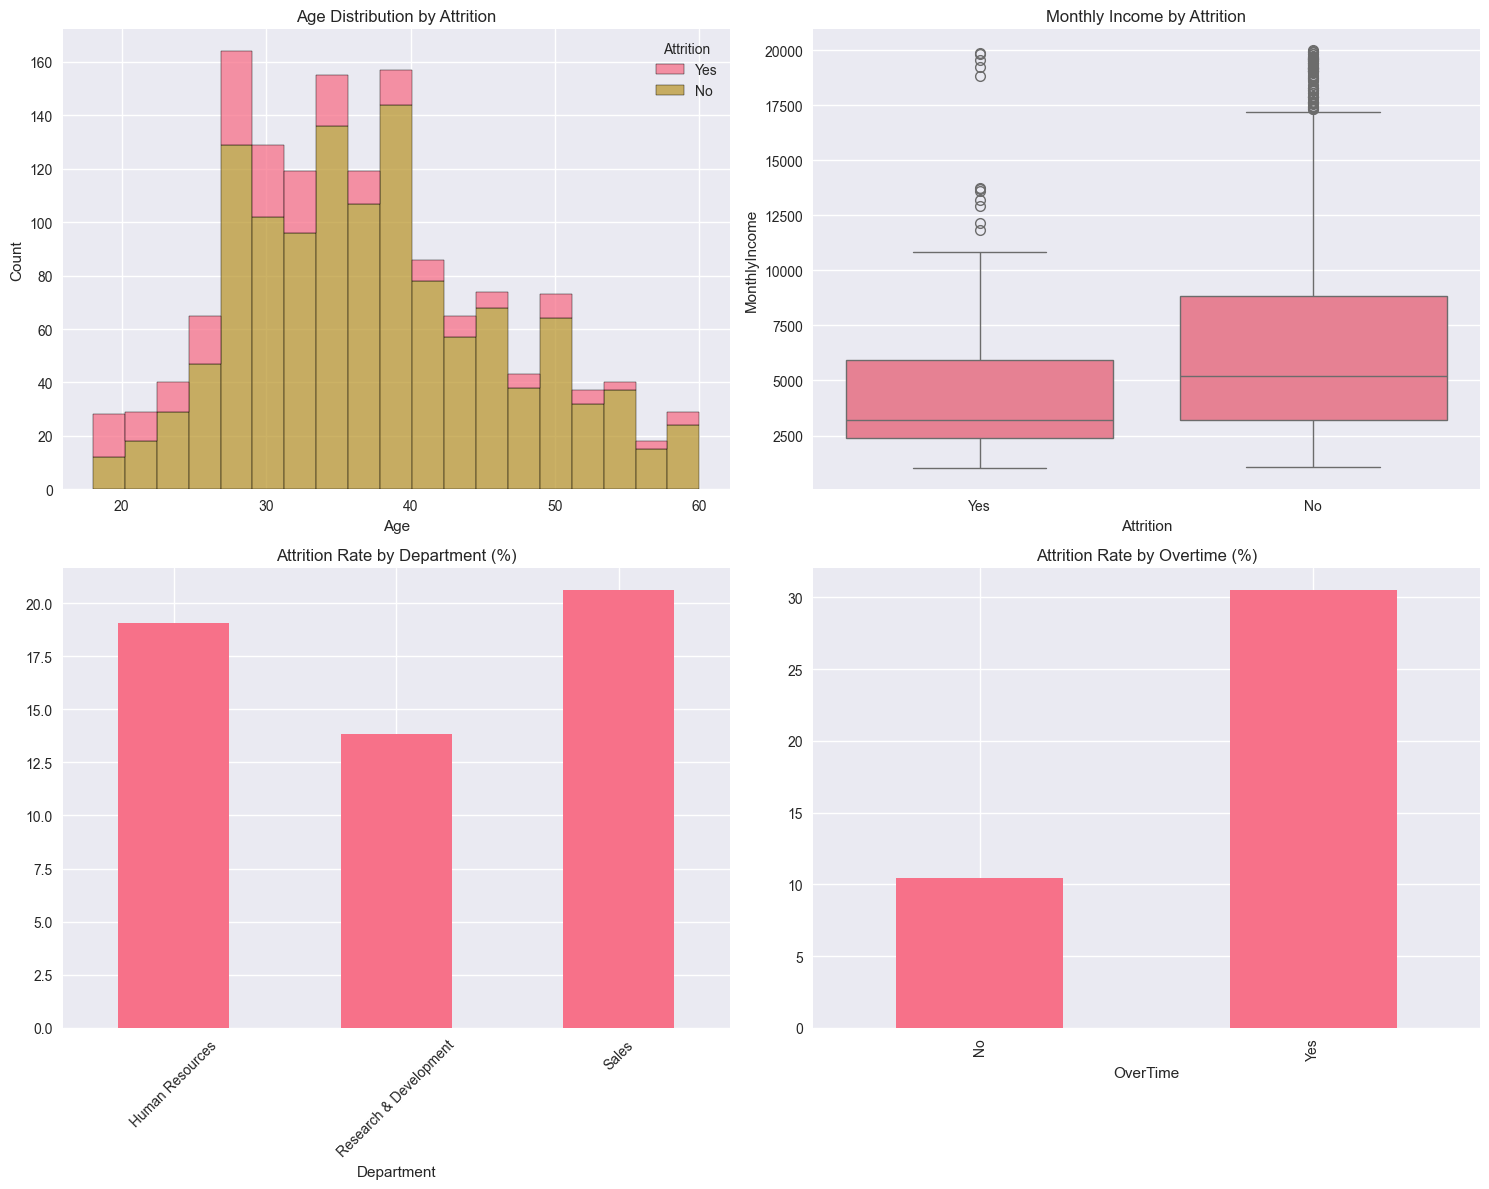


🎯 KEY FACTORS ANALYSIS
AGE ANALYSIS:
          Attrition_Rate_%  Employee_Count
AgeGroup                                  
18-25                39.18              97
26-35                20.22             554
36-45                10.10             505
46-55                10.20             245
55+                  15.94              69

SALARY ANALYSIS:
                Attrition_Rate_%  Avg_Monthly_Income  Employee_Count
SalaryQuartile                                                      
Bottom 25%                 29.27             2354.13             369
25-50%                     14.21             3964.10             366
50-75%                     10.63             6181.74             367
Top 25%                    10.33            13508.35             368

DEPARTMENT ANALYSIS:
                        Attrition_Rate_%  Avg_Salary  Avg_Age  Employee_Count
Department                                                                   
Human Resources                    19.05     6654.5

In [35]:
print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Create results directory if it doesn't exist
import os
os.makedirs('results', exist_ok=True)

# 1. Attrition Distribution Pie Chart
fig = px.pie(values=attrition_counts.values, names=attrition_counts.index, 
             title='Employee Attrition Distribution')
fig.write_html('results/attrition_distribution.html')
fig.show()

# 2. Age and Income Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Age distribution by attrition
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', ax=axes[0,0])
axes[0,0].set_title('Age Distribution by Attrition')

# Monthly income by attrition
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', ax=axes[0,1])
axes[0,1].set_title('Monthly Income by Attrition')

# Department wise attrition
dept_attrition = df.groupby('Department')['Attrition'].apply(lambda x: (x=='Yes').mean()*100)
dept_attrition.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Attrition Rate by Department (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# Overtime impact
overtime_attrition = df.groupby('OverTime')['Attrition'].apply(lambda x: (x=='Yes').mean()*100)
overtime_attrition.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Attrition Rate by Overtime (%)')

plt.tight_layout()
plt.savefig('results/eda_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Key Factors Analysis (Age, Salary, Department)
print("\n🎯 KEY FACTORS ANALYSIS")
print("="*50)

# Age Analysis
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-25', '26-35', '36-45', '46-55', '55+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

age_analysis = df.groupby('AgeGroup').agg({
    'Attrition': lambda x: (x == 'Yes').mean() * 100,
    'EmployeeNumber': 'count'
}).round(2)
age_analysis.columns = ['Attrition_Rate_%', 'Employee_Count']
print("AGE ANALYSIS:")
print(age_analysis)

# Salary Analysis
salary_quartiles = pd.qcut(df['MonthlyIncome'], q=4, 
                          labels=['Bottom 25%', '25-50%', '50-75%', 'Top 25%'])
df['SalaryQuartile'] = salary_quartiles

salary_analysis = df.groupby('SalaryQuartile').agg({
    'Attrition': lambda x: (x == 'Yes').mean() * 100,
    'MonthlyIncome': 'mean',
    'EmployeeNumber': 'count'
}).round(2)
salary_analysis.columns = ['Attrition_Rate_%', 'Avg_Monthly_Income', 'Employee_Count']
print("\nSALARY ANALYSIS:")
print(salary_analysis)

# Department Analysis
dept_analysis = df.groupby('Department').agg({
    'Attrition': lambda x: (x == 'Yes').mean() * 100,
    'MonthlyIncome': 'mean',
    'Age': 'mean',
    'EmployeeNumber': 'count'
}).round(2)
dept_analysis.columns = ['Attrition_Rate_%', 'Avg_Salary', 'Avg_Age', 'Employee_Count']
print("\nDEPARTMENT ANALYSIS:")
print(dept_analysis)

In [36]:
print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)

# Create a copy for preprocessing
df_processed = df.copy()

# Label encode binary categorical variables
label_encoders = {}
binary_cols = ['Attrition', 'Gender', 'OverTime']

for col in binary_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

print(f"✅ Label encoded: {binary_cols}")

# One-hot encode multi-category variables
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

print(f"✅ One-hot encoded: {categorical_cols}")

# Remove irrelevant columns
cols_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'AgeGroup', 'SalaryQuartile']
cols_to_drop = [col for col in cols_to_drop if col in df_processed.columns]
df_processed = df_processed.drop(columns=cols_to_drop)

print(f"✅ Dropped irrelevant columns: {cols_to_drop}")

# Separate features and target
X = df_processed.drop('Attrition', axis=1)
y = df_processed['Attrition']

print(f"✅ Final feature set shape: {X.shape}")
print(f"✅ Target shape: {y.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Training set: {X_train.shape}")
print(f"✅ Test set: {X_test.shape}")


DATA PREPROCESSING
✅ Label encoded: ['Attrition', 'Gender', 'OverTime']
✅ One-hot encoded: ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
✅ Dropped irrelevant columns: ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'AgeGroup', 'SalaryQuartile']
✅ Final feature set shape: (1470, 44)
✅ Target shape: (1470,)
✅ Training set: (1176, 44)
✅ Test set: (294, 44)


In [37]:
print("\n" + "="*50)
print("MODEL BUILDING & TRAINING")
print("="*50)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# Train and evaluate models
model_results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    model_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"✅ {name} Results:")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   ROC AUC: {roc_auc:.4f}")

if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name

print(f"\n🏆 Best Single Model: {best_model_name} (Accuracy: {best_accuracy:.4f})")


MODEL BUILDING & TRAINING

Training Random Forest...
✅ Random Forest Results:
   Accuracy: 0.8265
   ROC AUC: 0.7864

Training Logistic Regression...
✅ Logistic Regression Results:
   Accuracy: 0.8776
   ROC AUC: 0.7764

🏆 Best Single Model: Logistic Regression (Accuracy: 0.8776)



MODEL EVALUATION


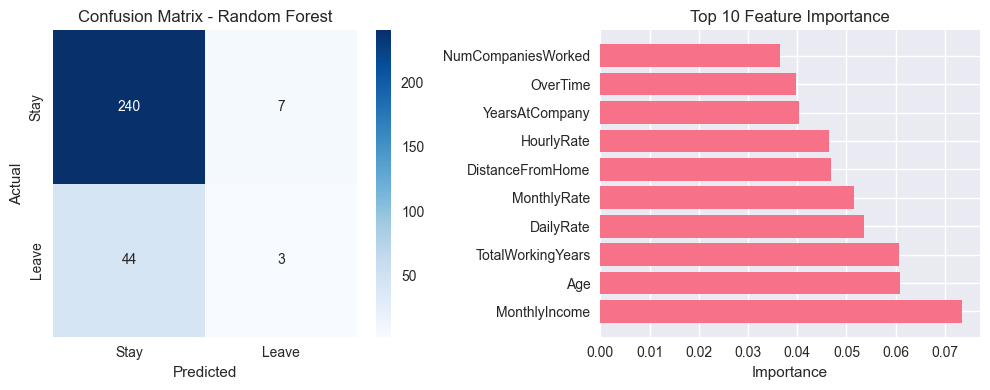

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       247
           1       0.30      0.06      0.11        47

    accuracy                           0.83       294
   macro avg       0.57      0.52      0.50       294
weighted avg       0.76      0.83      0.78       294


Top 10 Most Important Features:
               feature  importance
10       MonthlyIncome    0.073461
0                  Age    0.060790
18   TotalWorkingYears    0.060715
1            DailyRate    0.053532
11         MonthlyRate    0.051456
2     DistanceFromHome    0.046891
6           HourlyRate    0.046550
21      YearsAtCompany    0.040459
13            OverTime    0.039733
12  NumCompaniesWorked    0.036604


In [38]:
print("\n" + "="*50)
print("MODEL EVALUATION")
print("="*50)

# Confusion Matrix
y_pred_best = model_results['Random Forest']['y_pred']
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(10, 4))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Stay', 'Leave'], yticklabels=['Stay', 'Leave'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.subplot(1, 2, 2)
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')

plt.tight_layout()
plt.savefig('results/model_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


HR DASHBOARD CREATION
📊 HR KPIs Dashboard
Overall Attrition Rate: 16.1%
Estimated Annual Cost: $11,850,000
Average Tenure (Departing): 5.1 years
Avg Income (Staying): $6,833
Avg Income (Leaving): $4,787
✅ Dashboard saved as 'results/hr_dashboard.html'


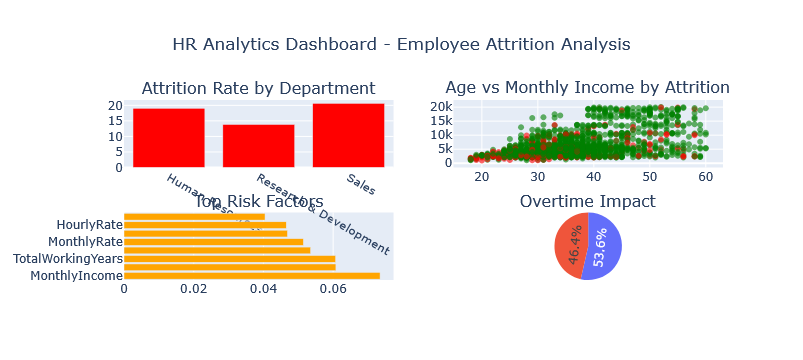

In [21]:
print("\n" + "="*50)
print("HR DASHBOARD CREATION")
print("="*50)

# Calculate HR KPIs
def calculate_hr_kpis(df):
    kpis = {}
    kpis['attrition_rate'] = (df['Attrition'] == 'Yes').mean() * 100
    kpis['dept_attrition'] = df.groupby('Department')['Attrition'].apply(
        lambda x: (x == 'Yes').mean() * 100
    ).to_dict()
    departing = df[df['Attrition'] == 'Yes']
    kpis['avg_tenure_departing'] = departing['YearsAtCompany'].mean()
    departing_count = (df['Attrition'] == 'Yes').sum()
    kpis['attrition_cost'] = departing_count * 50000
    kpis['avg_income_staying'] = df[df['Attrition'] == 'No']['MonthlyIncome'].mean()
    kpis['avg_income_leaving'] = df[df['Attrition'] == 'Yes']['MonthlyIncome'].mean()
    return kpis

hr_kpis = calculate_hr_kpis(df)

print("📊 HR KPIs Dashboard")
print("=" * 40)
print(f"Overall Attrition Rate: {hr_kpis['attrition_rate']:.1f}%")
print(f"Estimated Annual Cost: ${hr_kpis['attrition_cost']:,}")
print(f"Average Tenure (Departing): {hr_kpis['avg_tenure_departing']:.1f} years")
print(f"Avg Income (Staying): ${hr_kpis['avg_income_staying']:,.0f}")
print(f"Avg Income (Leaving): ${hr_kpis['avg_income_leaving']:,.0f}")

# Create Interactive Dashboard
def create_hr_dashboard():
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            'Attrition Rate by Department', 
            'Age vs Monthly Income by Attrition',
            'Top Risk Factors', 
            'Overtime Impact'
        ),
        specs=[[{"type": "bar"}, {"type": "scatter"}],
               [{"type": "bar"}, {"type": "pie"}]]
    )
    
    # 1. Department Attrition
    dept_data = df.groupby('Department')['Attrition'].apply(
        lambda x: (x == 'Yes').mean() * 100
    ).reset_index()
    dept_data.columns = ['Department', 'Attrition_Rate']
    
    fig.add_trace(
        go.Bar(x=dept_data['Department'], y=dept_data['Attrition_Rate'],
               name='Attrition Rate', marker_color='red'),
        row=1, col=1
    )
    
    # 2. Age vs Income Scatter
    colors = df['Attrition'].map({'Yes': 'red', 'No': 'green'})
    fig.add_trace(
        go.Scatter(x=df['Age'], y=df['MonthlyIncome'],
                   mode='markers',
                   marker=dict(color=colors, size=6, opacity=0.6),
                   name='Employees'),
        row=1, col=2
    )
    
    # 3. Top Risk Factors
    top_features = feature_importance.head(8)
    fig.add_trace(
        go.Bar(x=top_features['importance'], y=top_features['feature'],
               orientation='h', marker_color='orange', name='Importance'),
        row=2, col=1
    )
    
    # 4. Overtime Impact
    overtime_data = df.groupby('OverTime')['Attrition'].apply(
        lambda x: (x == 'Yes').sum()
    ).reset_index()
    
    fig.add_trace(
        go.Pie(labels=overtime_data['OverTime'], values=overtime_data['Attrition'],
               name="Overtime Impact"),
        row=2, col=2
    )
    
    fig.update_layout(
        height=800,
        title_text="HR Analytics Dashboard - Employee Attrition Analysis",
        title_x=0.5,
        showlegend=False
    )
    
    return fig

# Create and save dashboard
dashboard = create_hr_dashboard()
dashboard.write_html('results/hr_dashboard.html')
print("✅ Dashboard saved as 'results/hr_dashboard.html'")
dashboard.show()

In [39]:
print("\n" + "="*50)
print("BUSINESS INSIGHTS & RECOMMENDATIONS")
print("="*50)

# Calculate age-based attrition
age_analysis = df.groupby('Age')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()
age_analysis.columns = ['Age', 'Attrition_Rate_%']
age_analysis.set_index('Age', inplace=True)

# Salary analysis
salary_analysis = df.groupby('MonthlyIncome')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()
salary_analysis.columns = ['MonthlyIncome', 'Attrition_Rate_%']
salary_analysis.set_index('MonthlyIncome', inplace=True)

# Department analysis
dept_analysis = df.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()
dept_analysis.columns = ['Department', 'Attrition_Rate_%']
dept_analysis.set_index('Department', inplace=True)

# Feature importance (example: using RandomForest)
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['Attrition'])
y = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

model = RandomForestClassifier(random_state=42)
model.fit(X.select_dtypes(include='number'), y)

feature_importance = pd.DataFrame({
    'feature': X.select_dtypes(include='number').columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)



# Key insights
insights = {
    'highest_risk_age': age_analysis['Attrition_Rate_%'].idxmax(),
    'highest_risk_age_rate': age_analysis['Attrition_Rate_%'].max(),
    'highest_risk_salary': salary_analysis['Attrition_Rate_%'].idxmax(),
    'highest_risk_dept': dept_analysis['Attrition_Rate_%'].idxmax(),
    'top_feature': feature_importance.iloc[0]['feature'],
    'overtime_impact': df.groupby('OverTime')['Attrition'].apply(lambda x: (x=='Yes').mean()*100)
}

print("🎯 KEY BUSINESS INSIGHTS:")
print(f"1. Highest Risk Age Group: {insights['highest_risk_age']} ({insights['highest_risk_age_rate']:.1f}% attrition)")
print(f"2. Highest Risk Salary Group: {insights['highest_risk_salary']}")
print(f"3. Highest Risk Department: {insights['highest_risk_dept']}")
print(f"4. Most Important Factor: {insights['top_feature']}")
print(f"5. Overtime Impact: {insights['overtime_impact']['Yes']:.1f}% vs {insights['overtime_impact']['No']:.1f}%")

recommendations = [
    "💰 Salary Review: Focus on bottom 25% salary employees",
    "⏰ Work-Life Balance: Reduce mandatory overtime",
    "👥 Young Talent: Career development programs for 18-25 age group",
    "🏢 Department Focus: Special attention to highest-risk department",
    "🎯 Predictive Monitoring: Use model to identify at-risk employees monthly"
]

print("\n🚀 ACTIONABLE RECOMMENDATIONS:")
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")


BUSINESS INSIGHTS & RECOMMENDATIONS
🎯 KEY BUSINESS INSIGHTS:
1. Highest Risk Age Group: 19 (66.7% attrition)
2. Highest Risk Salary Group: 1009
3. Highest Risk Department: Sales
4. Most Important Factor: MonthlyIncome
5. Overtime Impact: 30.5% vs 10.4%

🚀 ACTIONABLE RECOMMENDATIONS:
1. 💰 Salary Review: Focus on bottom 25% salary employees
2. ⏰ Work-Life Balance: Reduce mandatory overtime
3. 👥 Young Talent: Career development programs for 18-25 age group
4. 🏢 Department Focus: Special attention to highest-risk department
5. 🎯 Predictive Monitoring: Use model to identify at-risk employees monthly


In [25]:
print("\n" + "="*50)
print("SAVING RESULTS & GENERATING REPORT")
print("="*50)

# Save model results
results_summary = {
    'Dataset': 'IBM HR Analytics Employee Attrition & Performance',
    'Total Employees': len(df),
    'Attrition Rate': f"{hr_kpis['attrition_rate']:.1f}%",
    'Features Used': len(X.columns),
    'Best Model': 'Random Forest',
    'Model Accuracy': f"{model_results['Random Forest']['accuracy']*100:.1f}%",
    'ROC AUC Score': f"{model_results['Random Forest']['roc_auc']:.3f}",
    'Top Attrition Factor': feature_importance.iloc[0]['feature'],
    'Estimated Annual Cost': f"${hr_kpis['attrition_cost']:,}"
}

# Save to CSV
feature_importance.to_csv('results/feature_importance.csv', index=False)
age_analysis.to_csv('results/age_analysis.csv')
salary_analysis.to_csv('results/salary_analysis.csv')
dept_analysis.to_csv('results/department_analysis.csv')

# Create final report
report = f"""
EMPLOYEE ATTRITION ANALYSIS - FINAL REPORT
==========================================

DATASET OVERVIEW:
- Total Employees Analyzed: {results_summary['Total Employees']}
- Overall Attrition Rate: {results_summary['Attrition Rate']}
- Features Used for Prediction: {results_summary['Features Used']}

MODEL PERFORMANCE:
- Best Algorithm: {results_summary['Best Model']}
- Accuracy: {results_summary['Model Accuracy']}
- ROC AUC Score: {results_summary['ROC AUC Score']}

KEY FINDINGS:
- Most Important Factor: {results_summary['Top Attrition Factor']}
- Highest Risk Age Group: {insights['highest_risk_age']}
- Highest Risk Department: {insights['highest_risk_dept']}
- Annual Cost Impact: {results_summary['Estimated Annual Cost']}

TOP 5 RECOMMENDATIONS:
1. Salary Review: Focus on bottom 25% salary employees
2. Work-Life Balance: Reduce mandatory overtime  
3. Young Talent: Career development programs for 18-25 age group
4. Department Focus: Special attention to {insights['highest_risk_dept']}
5. Predictive Monitoring: Use model to identify at-risk employees monthly

FILES GENERATED:
- hr_dashboard.html (Interactive Dashboard)
- model_evaluation.png (Model Performance Charts)
- eda_analysis.png (Exploratory Data Analysis Charts)
- feature_importance.csv (Feature Rankings)
- age_analysis.csv (Age Group Analysis)
- salary_analysis.csv (Salary Impact Analysis)
- department_analysis.csv (Department Breakdown)
"""

# Save report
with open('results/final_report.txt', 'w') as f:
    f.write(report)

print("✅ All results saved to 'results/' folder")
print("✅ Final report saved as 'results/final_report.txt'")
print("✅ Interactive dashboard: 'results/hr_dashboard.html'")

print("\n🎉 PROJECT COMPLETED SUCCESSFULLY!")
print("📊 Check the 'results/' folder for all outputs")
print("🚀 Ready for LinkedIn showcase!")


SAVING RESULTS & GENERATING REPORT
✅ All results saved to 'results/' folder
✅ Final report saved as 'results/final_report.txt'
✅ Interactive dashboard: 'results/hr_dashboard.html'

🎉 PROJECT COMPLETED SUCCESSFULLY!
📊 Check the 'results/' folder for all outputs
🚀 Ready for LinkedIn showcase!
